<a href="https://colab.research.google.com/github/lynnido/the_bootstrap/blob/main/Copy_of_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 29 (delta 2), reused 3 (delta 1), pack-reused 21 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 5.78 MiB/s, done.
Resolving deltas: 100% (3/3), done.


**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500 

breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000 

Raw treatment effect:  0.00011505110015985753


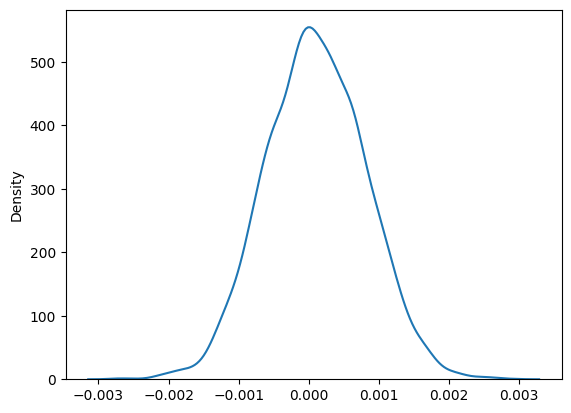

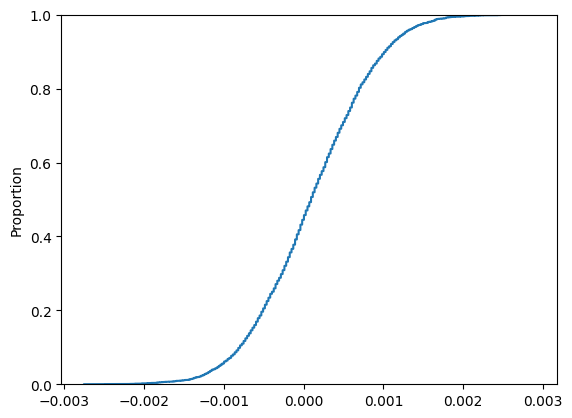

99% confidence interval: ( -0.0017996001649003657 ,  0.0019630948411384417 )


In [6]:
df = pd.read_csv('the_bootstrap/data/mammogram.csv')

## 1.

print( pd.crosstab( df['treatment'], df['breast_cancer_death']) , '\n')
print( pd.crosstab( df['treatment'], df['breast_cancer_death'], margins=True, normalize=True) , '\n')

raw_treatment_effect = 44425/44925 - 44405/44910
print('Raw treatment effect: ', raw_treatment_effect)

## 2.

df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

S = 5000
fx = []
for t in range(S):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    #
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

## 3.
level = .99
lower_bound = np.quantile(fx, .005 )
upper_bound = np.quantile(fx, .995)

print('99% confidence interval: (', lower_bound, ', ', upper_bound, ')' )

Since the 99% confidence interval includes zero, it can suggest that getting a mammogram will not significantly be different in 25-year survival rates. If we took the results more seriously, we can begin to ask more questions to gain a better insight. Such as if the mammograms are randomly assigned or if wealthier people are getting selected. Moreover, breast cancer might be lower in certain treatment groups compared to lets say the control group, so it could make it appear as if mammograms are not useful. There are aso many different factors that can be the cause of breast cancer. While mammograms do not seem effective in reducing breast cancer, it can be effective for certain groups such as those who are at higher risk. Lastly, this only examines mortality. This is not a true examination as there can other measures which improve the quality of life by catching breast cancer early on.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

In [7]:
df.head()

,treatment,breast_cancer_death,survive
0,mammogram,yes,0
1,mammogram,yes,0
2,mammogram,yes,0
3,mammogram,yes,0
4,mammogram,yes,0


outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143 

outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699 

outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000 

lifestyle success rate:  0.5341880341880342 

met success rate:  0.4827586206896552 

rosi success rate:  0.6137339055793991 



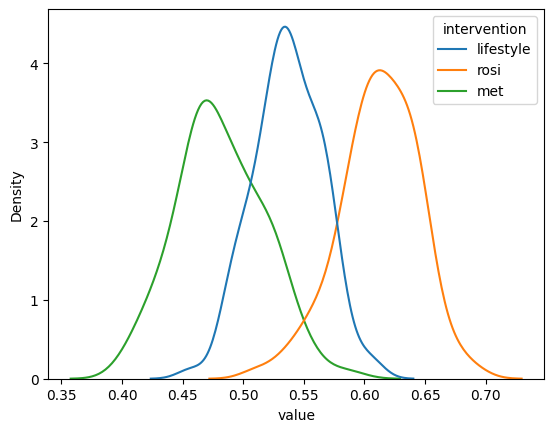

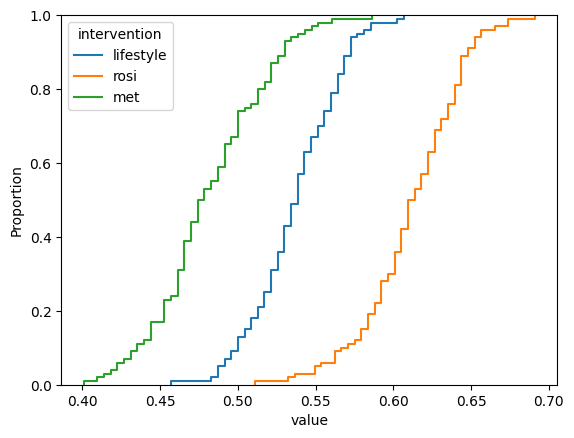

In [9]:
df = pd.read_csv('the_bootstrap/data/diabetes_hw.csv')
df['success'] = 0
df.loc[df['outcome']=='success','success'] = 1

## 1.
print(pd.crosstab(df['treatment'], df['outcome']), '\n')
print(pd.crosstab(df['treatment'], df['outcome'], margins=True), '\n')
print(pd.crosstab(df['treatment'], df['outcome'], margins=True, normalize=True), '\n')

## 2.
print('lifestyle success rate: ', 125/(125+109), '\n')
print('met success rate: ', 112/(112+120), '\n')
print('rosi success rate: ', 143/(143+90), '\n')

## 3.
df_lif = df.loc[ df['treatment'] == 'lifestyle', :]
df_ros = df.loc[ df['treatment'] == 'rosi', :]
df_met = df.loc[ df['treatment'] == 'met', :]

S = 100
fx_lif = []
fx_ros = []
fx_met = []
for t in range(S):
    df_lif_t = df_lif.sample( df_lif.shape[0], axis=0, replace=True)
    df_ros_t = df_ros.sample( df_ros.shape[0], axis=0, replace=True)
    df_met_t = df_met.sample( df_met.shape[0], axis=0, replace=True)
    #
    fx_lif_t = np.mean(df_lif_t['success'])
    fx_ros_t = np.mean(df_ros_t['success'])
    fx_met_t = np.mean(df_met_t['success'])
    #
    fx_lif.append(fx_lif_t)
    fx_ros.append(fx_ros_t)
    fx_met.append(fx_met_t)

gdf_lif = pd.DataFrame({'value':fx_lif, 'intervention':'lifestyle'})
gdf_ros = pd.DataFrame({'value':fx_ros, 'intervention':'rosi'})
gdf_met = pd.DataFrame({'value':fx_met, 'intervention':'met'})
gdf = pd.concat([gdf_lif, gdf_ros, gdf_met], axis=0)

sns.kdeplot(data=gdf, x='value', hue = 'intervention')
plt.show()

sns.ecdfplot(data=gdf, x='value', hue = 'intervention')
plt.show()

Rosi is the most effective. The next most effective treatment is lifestyle, and lasty metformin.

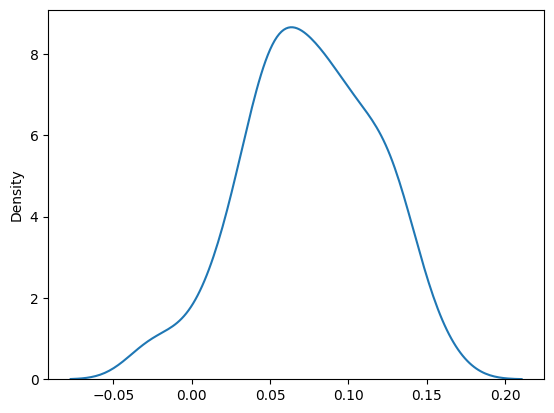

90% Confidence interval, rosi minus lifestyle:  0.010175708888155196 ,  0.13515828472910021


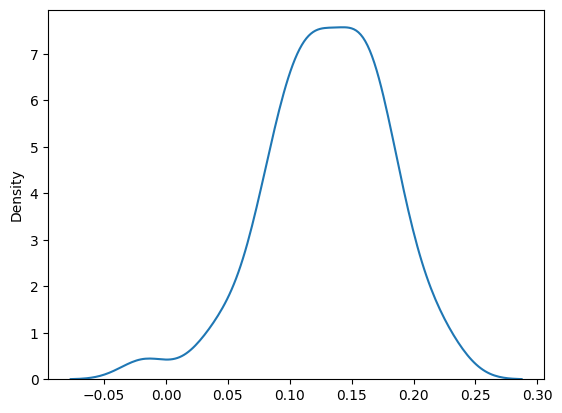

90% Confidence interval, rosi minus metformin:  0.04890298949237831 ,  0.20008047210300428


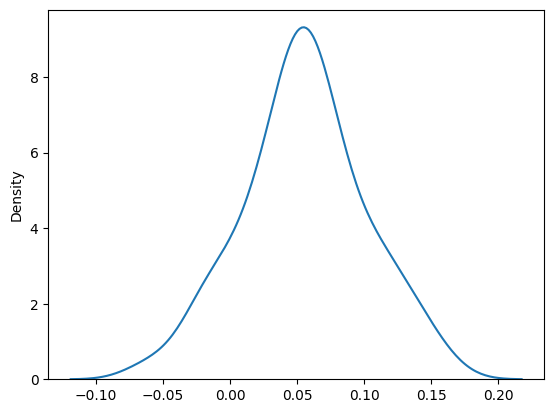

90% Confidence interval, lifestyle minus metformin:  -0.02176171529619807 ,  0.12933429118773937


In [10]:
## 4.

rosi_versus_lifestyle = np.array(fx_ros)-np.array(fx_lif)
sns.kdeplot(x=rosi_versus_lifestyle)
plt.show()
print('90% Confidence interval, rosi minus lifestyle: ', np.quantile(rosi_versus_lifestyle,.05), ', ', np.quantile(rosi_versus_lifestyle,.95))

rosi_versus_met = np.array(fx_ros)-np.array(fx_met)
sns.kdeplot(x=rosi_versus_met)
plt.show()
print('90% Confidence interval, rosi minus metformin: ', np.quantile(rosi_versus_met,.05), ', ', np.quantile(rosi_versus_met,.95))

lif_versus_met = np.array(fx_lif)-np.array(fx_met)
sns.kdeplot(x=lif_versus_met)
plt.show()
print('90% Confidence interval, lifestyle minus metformin: ', np.quantile(lif_versus_met,.05), ', ', np.quantile(lif_versus_met,.95))

Rosi seems to be better than lifestyle for the reasoning that the 90% confidence interval does not include zero. We are 90% confidence that the difference in effect sizes is between 0.0101 and 0.135. Moreover, Rosi also seems to be better than Metformin because the 90% confidence interval does not include zero as well. We are 90% confidence that the difference in effect sizes is between 0.0489 and 0.2. Lastly, there is not much statistical significance between lifestyle and metformin because the zero is the 90% confidence interval. We can conclude that we are 90% confidence that the difference in effect sizes is between -0.021 and 0.129.

5.

Looking at what treatment is most effective overall, I would say that the safest option is lifestyle. While Rosi was the overall better option, I think by changing one's lifestyle rather than relying on a drug can be a more sustainable and safer option. This is because we are not sure about the long-term effects of the drugs which are not outlined in the study. Moreover, by changing and improving one's lifestyle they can also avoid other health issues as well, so it can be a treatment for multiple aspects. Overall, I think improving one's lifestyle has many benefits and is the most effective treatment method.